# Minería de Texto

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import importlib
import funciones
importlib.reload(funciones)


<module 'funciones' from '/home/tux/text-mining/funciones.py'>

### 1. Preprocesamiento del texto

In [2]:
nltk.data.path.append('/home/tux/nltk_data')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to /home/tux/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/tux/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/tux/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/tux/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/tux/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/tux/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [3]:
# url = 'https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv'
df = pd.read_csv('data/sms.tsv', sep='\t', names=['label', 'message'])
print(df.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [4]:
df['cleaned'] = funciones.preprocess(df['message'])
print(df['cleaned'].head())

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
3        [u, dun, say, early, hor, u, c, already, say]
4    [nah, dont, think, goes, usf, lives, around, t...
Name: cleaned, dtype: object


In [5]:
df['lemmas'] = funciones.lemmatize(df['cleaned'])
df['lemmas'].head()

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
3        [u, dun, say, early, hor, u, c, already, say]
4    [nah, dont, think, go, usf, life, around, though]
Name: lemmas, dtype: object

In [6]:
display(df)

,label,message,cleaned,lemmas
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, go, usf, life, around, though]"
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,"[2nd, time, tried, 2, contact, u, u, £750, pou...","[2nd, time, try, 2, contact, u, u, £750, pound..."
5568,ham,Will ü b going to esplanade fr home?,"[ü, b, going, esplanade, fr, home]","[ü, b, go, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...","[pity, mood, soany, suggestions]","[pity, mood, soany, suggestion]"
5570,ham,The guy did some bitching but I acted like i'd...,"[guy, bitching, acted, like, id, interested, b...","[guy, bitch, act, like, id, interested, buying..."


In [7]:
exploded_words = df.explode('cleaned')
words_frequency = exploded_words['cleaned'].value_counts().head(20)
print(words_frequency)

cleaned
u       1133
call     578
2        482
im       464
ur       390
get      386
4        293
dont     287
go       281
ok       278
ltgt     276
free     275
know     257
got      251
like     244
ill      239
good     236
come     229
time     208
day      203
Name: count, dtype: int64


In [8]:
per_label_words = exploded_words.groupby('label')['cleaned'].value_counts().head(20)
print(per_label_words)

label  cleaned
ham    u          985
       im         451
       2          309
       get        303
       ltgt       276
       ok         273
       dont       265
       go         250
       ur         246
       got        244
       ill        238
       know       232
       call       231
       like       231
       come       227
       good       224
       love       190
       time       189
       day        188
       4          174
Name: count, dtype: int64


In [9]:
exploded_lemmas = df.explode('lemmas')
lemmas_frequency = exploded_lemmas['lemmas'].value_counts().head(20)
print(lemmas_frequency)

lemmas
u       1196
get      698
call     655
go       554
2        482
im       464
ur       390
come     326
4        293
dont     287
know     281
ok       278
ltgt     276
free     275
like     253
good     247
send     243
day      242
ill      239
want     238
Name: count, dtype: int64


In [10]:
per_label_lemmas = exploded_lemmas.groupby('label')['lemmas'].value_counts().head(20)
print(per_label_lemmas)

label  lemmas
ham    u         1040
       get        604
       go         519
       im         451
       come       320
       2          309
       call       289
       ltgt       276
       ok         273
       dont       265
       know       255
       ur         246
       like       240
       ill        238
       good       234
       say        225
       love       220
       time       216
       day        215
       want       206
Name: count, dtype: int64

### 2. Vectorización

In [11]:
df['lemmas_str'] = df['lemmas'].apply(lambda tokens: ' '.join(tokens))

vectorizer = TfidfVectorizer(
    max_df=0.90,
    min_df=2,
    ngram_range=(1, 2),
    stop_words=stopwords.words('english')
)

In [12]:
tfidf_matrix = vectorizer.fit_transform(df['lemmas_str'])
print("Vocabulary example:", list(vectorizer.vocabulary_.items())[:10])

Vocabulary example: [('go', 3641), ('point', 6564), ('crazy', 2278), ('available', 1189), ('bugis', 1585), ('great', 3818), ('world', 9403), ('la', 4750), ('buffet', 1584), ('cine', 1963)]


In [13]:
feature_names = vectorizer.get_feature_names_out()
print("Feature names example:", feature_names)

Feature names example: ['008704050406' '008704050406 sp' '01223585334' ... 'zed 08701417012150p'
 'zoe' 'üll']


In [14]:
tfidf_sums = tfidf_matrix.sum(axis=0).A1  # convert from matrix to array
tfidf_scores = list(zip(feature_names, tfidf_sums))
sorted_terms = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)
for term, score in sorted_terms[:20]:
    print(f"{term:25} {score:.4f}")


get                       105.6532
call                      91.7734
go                        89.3616
ok                        85.0357
im                        83.6836
come                      69.8149
ill                       56.5916
ltgt                      55.2186
ur                        54.6230
know                      54.5557
dont                      53.0087
like                      51.5833
good                      50.3888
time                      48.6520
want                      46.3418
send                      45.8301
say                       44.8002
think                     43.4631
day                       43.4358
see                       42.3313


## 3 Modelado y evaluación

In [15]:
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})
print(df['label_num'].value_counts())

label_num
0    4825
1     747
Name: count, dtype: int64


In [16]:
X = df['lemmas_str']
y = df['label_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [17]:
X_train_tfidf = vectorizer.transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [41]:
nb_model = MultinomialNB(
    alpha=0.1
)

nb_model.fit(X_train_tfidf, y_train)

lr_model = LogisticRegression(
    C=1,
    solver='liblinear',
    penalty='l1',
    max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression(C=1, max_iter=1000, penalty='l1', solver='liblinear')

In [42]:
nb_preds = nb_model.predict(X_test_tfidf)
lr_preds = lr_model.predict(X_test_tfidf)


Multinomial Naive Bayes - Evaluation Metrics
----------------------------------------
Accuracy: 0.9857

Classification Report:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       970
        spam       0.98      0.90      0.94       145

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



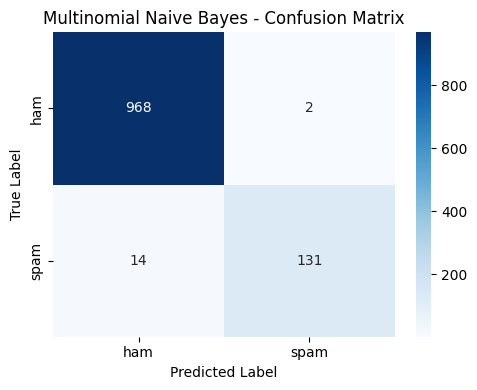


Logistic Regression - Evaluation Metrics
----------------------------------------
Accuracy: 0.9489

Classification Report:
              precision    recall  f1-score   support

         ham       0.95      0.99      0.97       970
        spam       0.92      0.67      0.77       145

    accuracy                           0.95      1115
   macro avg       0.93      0.83      0.87      1115
weighted avg       0.95      0.95      0.95      1115



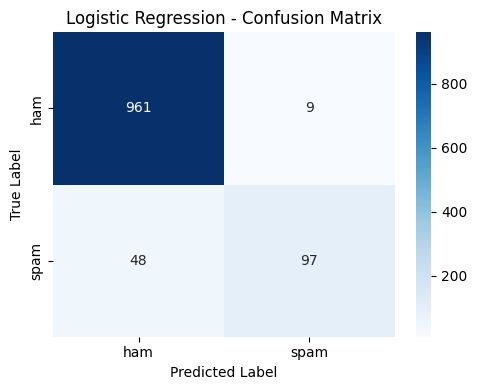

In [43]:
funciones.evaluate_model("Multinomial Naive Bayes", y_test, nb_preds)


funciones.evaluate_model("Logistic Regression", y_test, lr_preds)